In [1]:
import numpy as np
import pandas as pd

filename = 'data/K200.txt'

In [2]:
df = pd.read_csv(filename, delimiter='\t')

In [3]:
df.head()

,일자,시가,고가,저가,종가,5,20,60,120,거래량,5.1,20.1,60.1,120.1,Unnamed: 14
0,20180205,322.05,324.64,303.47,304.83,324.69,326.85,302.45,274.40,"550,481,000","536,881,600","460,138,000","395,659,417","381,767,783",NaN
1,20180129,337.28,339.27,326.30,327.01,329.52,327.29,301.71,273.92,"537,749,000","503,449,200","455,776,900","391,471,167","380,361,142",NaN
2,20180122,328.78,335.38,324.56,335.38,329.07,326.31,300.48,273.25,"510,623,000","442,048,400","448,082,350","387,160,500","378,120,667",NaN
3,20180115,328.57,331.88,326.21,329.52,326.23,324.93,299.09,272.43,"491,051,000","424,679,000","440,745,700","383,391,083","375,558,483",NaN
4,20180108,330.83,332.70,324.22,326.72,325.57,324.02,297.77,271.63,"594,504,000","433,487,000","432,932,250","382,107,483","373,928,983",NaN


In [19]:
df.tail()

,일자,시가,고가,저가,종가,5,20,60,120,거래량,5.1,20.1,60.1,120.1,Unnamed: 14
595,20060904,176.97,177.25,174.27,175.78,173.1,NaN,NaN,NaN,"423,792,000","402,564,400",NaN,NaN,NaN,NaN
596,20060828,172.98,176.71,172.27,175.99,NaN,NaN,NaN,NaN,"457,083,000",NaN,NaN,NaN,NaN,NaN
597,20060821,173.46,174.13,170.23,172.92,NaN,NaN,NaN,NaN,"398,562,000",NaN,NaN,NaN,NaN,NaN
598,20060814,168.11,173.87,167.12,173.17,NaN,NaN,NaN,NaN,"352,794,000",NaN,NaN,NaN,NaN,NaN
599,20060807,170.21,172.08,167.57,167.65,NaN,NaN,NaN,NaN,"380,591,000",NaN,NaN,NaN,NaN,NaN


In [5]:
kospi200 = df['시가'].values

In [6]:
type(kospi200)

numpy.ndarray

In [7]:
kospi200[:10]

array([ 322.05,  337.28,  328.78,  328.57,  330.83,  325.73,  322.14,
        327.09,  325.13,  326.31])

In [10]:
kospi200.shape

(600,)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [11]:
kospi200_scaled = scaler.fit_transform(kospi200.reshape(-1,1))

In [13]:
kospi200_scaled[:10]

array([[ 0.92278728],
       [ 0.99358498],
       [ 0.95407215],
       [ 0.95309595],
       [ 0.96360171],
       [ 0.93989401],
       [ 0.92320565],
       [ 0.94621607],
       [ 0.93710487],
       [ 0.94259018]])

In [15]:
min(kospi200_scaled), max(kospi200_scaled)

(array([ 0.]), array([ 1.]))

In [17]:
import matplotlib.pyplot as plt

from keras import layers
from keras import models


## 주가지수 그려보기

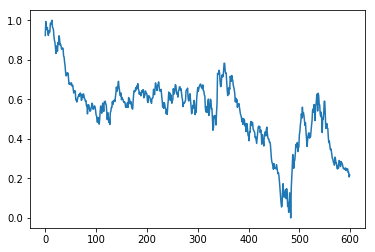

In [18]:
def plot_data(data):
    plt.plot(data)
    plt.show()
    
plot_data(kospi200_scaled)

## 앗 거꾸로 그렸다.

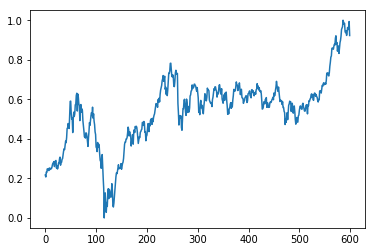

In [20]:
x = kospi200_scaled[::-1]

plot_data(x)

In [48]:
class LSTMMachine:
    def __init__(self, data, look_ahead):
        print('x')
        self.X, self.Y = self.generate_XY(data, look_ahead)
        input_shape = self.X.shape[1:]
        self.model = self.lstm_model(input_shape)
        
    
    def run(self, epochs=500):
        
        X, Y = self.X, self.Y
        
        history = self.model.fit(X, Y, epochs=epochs, verbose=0)
        predicted_Y = self.model.predict(X)
        
        plt.plot(Y, label='Original')
        plt.plot(predicted_Y, label='Prediction')
        plt.legend(loc=0)
        plt.show()
        
    
    def generate_XY(self, data, look_ahead):
        xs, ys = [], []
        for i in range(len(data)-1-look_ahead):
            xs.append(data[i:i+look_ahead])
            ys.append(data[i+look_ahead])
        X = np.array(xs)
        X = X.reshape(X.shape[0], X.shape[1], 1)
        Y = np.array(ys)
        return X, Y     
    
    def lstm_model(self, input_shape):
        m_x = layers.Input(shape=input_shape)
        m_h = layers.LSTM(20)(m_x)
        m_y = layers.Dense(1)(m_h)
        model = models.Model(m_x, m_y)
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model
    
    

In [49]:
def main():
    machine = LSTMMachine(x, 10)
    machine.run(epochs=300)

x


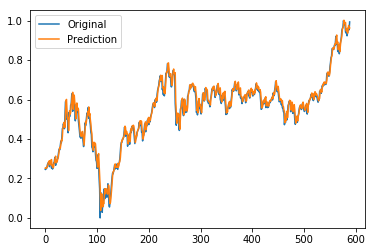

In [50]:
main()